In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

# Load the data
data = pd.read_csv('../data/GROUP1_TELCO_CHURN_FINAL.csv')  # Replace with your data file

# Create a contingency table
contingency_table = pd.crosstab(data['gender'], data['Churn'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Calculate Cramér's V
n = contingency_table.sum().sum()  # Total number of observations
k = min(contingency_table.shape)  # Minimum of rows or columns

cramers_v = np.sqrt(chi2 / (n * (k - 1)))

print(f"Cramér's V: {cramers_v}")

Cramér's V: 0.008290505631771371


In [ ]:
# 3. Categorical vs Numerical (Point Biserial Correlation for Binary Categorical Variables)
# Import pointbiserialr
from scipy.stats import pointbiserialr # Import the function

# Define numerical_columns here with the actual columns from your dataset
numerical_columns = ['tenure', 'contract_month', 'MonthlyCharges', 'TotalCharges']
binary_categorical_columns = ['gender', 'Churn', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'auto_bill', 'PaymentMethod', 'senior_yes', 'multiple_lines']
point_biserial_corr = pd.DataFrame(index=binary_categorical_columns, columns=numerical_columns)

# Ensure 'TotalCharges' is numeric and handle NaNs/infs
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
# Converts 'TotalCharges' to numeric. 'coerce' handles errors by setting invalid values to NaN.
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].mean())  # Replace NaNs with the mean.
#data['TotalCharges'] = data['TotalCharges'].replace([np.inf, -np.inf], np.nan) # Replace inf with NaN.
#data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].mean())  # Replace NaNs with the mean.



for cat_col in binary_categorical_columns:
    for num_col in numerical_columns:
        # Convert categorical column to numerical if it's not already
        if data[cat_col].dtype == 'object':  # Check if column is of type 'object' (string)
            # Assuming binary categories, convert to 0 and 1
            data[cat_col] = pd.factorize(data[cat_col])[0]
            # This line factorizes the categorical column, assigning numerical values (0, 1, 2, ...) to unique categories.
            # Using [0] selects only the first element of the output, which contains the numerical representation.
        # Drop rows with NaN in either column before calculating correlation
        valid_data = data[[cat_col, num_col]].dropna()
        # Creates a temporary DataFrame with only the relevant columns and drops rows with NaNs.

        correlation, _ = pointbiserialr(valid_data[cat_col], valid_data[num_col])
        # Calculates the correlation using the valid data.
        point_biserial_corr.loc[cat_col, num_col] = correlation

# Combine All Correlations
# Merge Pearson, Cramér's V, and Point Biserial correlations into one result

# Convert correlation matrices to float for easier manipulation
#categorical_corr = categorical_corr.astype(float)  # Assuming categorical_corr is defined elsewhere
point_biserial_corr = point_biserial_corr.astype(float)

# Display the correlations
#print("Numerical Correlations (Pearson):")
#print(numerical_corr)  # Assuming numerical_corr is defined elsewhere

#print("\nCategorical Correlations (Cramér's V):")
#print(categorical_corr)  # Assuming categorical_corr is defined elsewhere

print("\nCategorical vs Numerical Correlations (Point Biserial):")
print(point_biserial_corr)


Categorical vs Numerical Correlations (Point Biserial):
                    tenure  contract_month  MonthlyCharges  TotalCharges
gender            0.005106       -0.000045       -0.014569      0.000048
Churn            -0.352229       -0.394453        0.193356     -0.199428
SeniorCitizen     0.016567       -0.142117        0.220173      0.102395
Partner          -0.379697       -0.294178       -0.096848     -0.318812
Dependents        0.159712        0.242667       -0.113890      0.064535
PhoneService      0.008448        0.002315        0.247398      0.112851
MultipleLines     0.258958        0.083753        0.490700      0.412079
InternetService  -0.030359        0.100294       -0.323260     -0.175429
OnlineSecurity    0.145298        0.389431       -0.621227     -0.153051
OnlineBackup     -0.253743        0.036239       -0.710477     -0.536976
DeviceProtection  0.178649        0.389530       -0.513440     -0.077305
TechSupport       0.144459        0.418049       -0.597594     -0.1

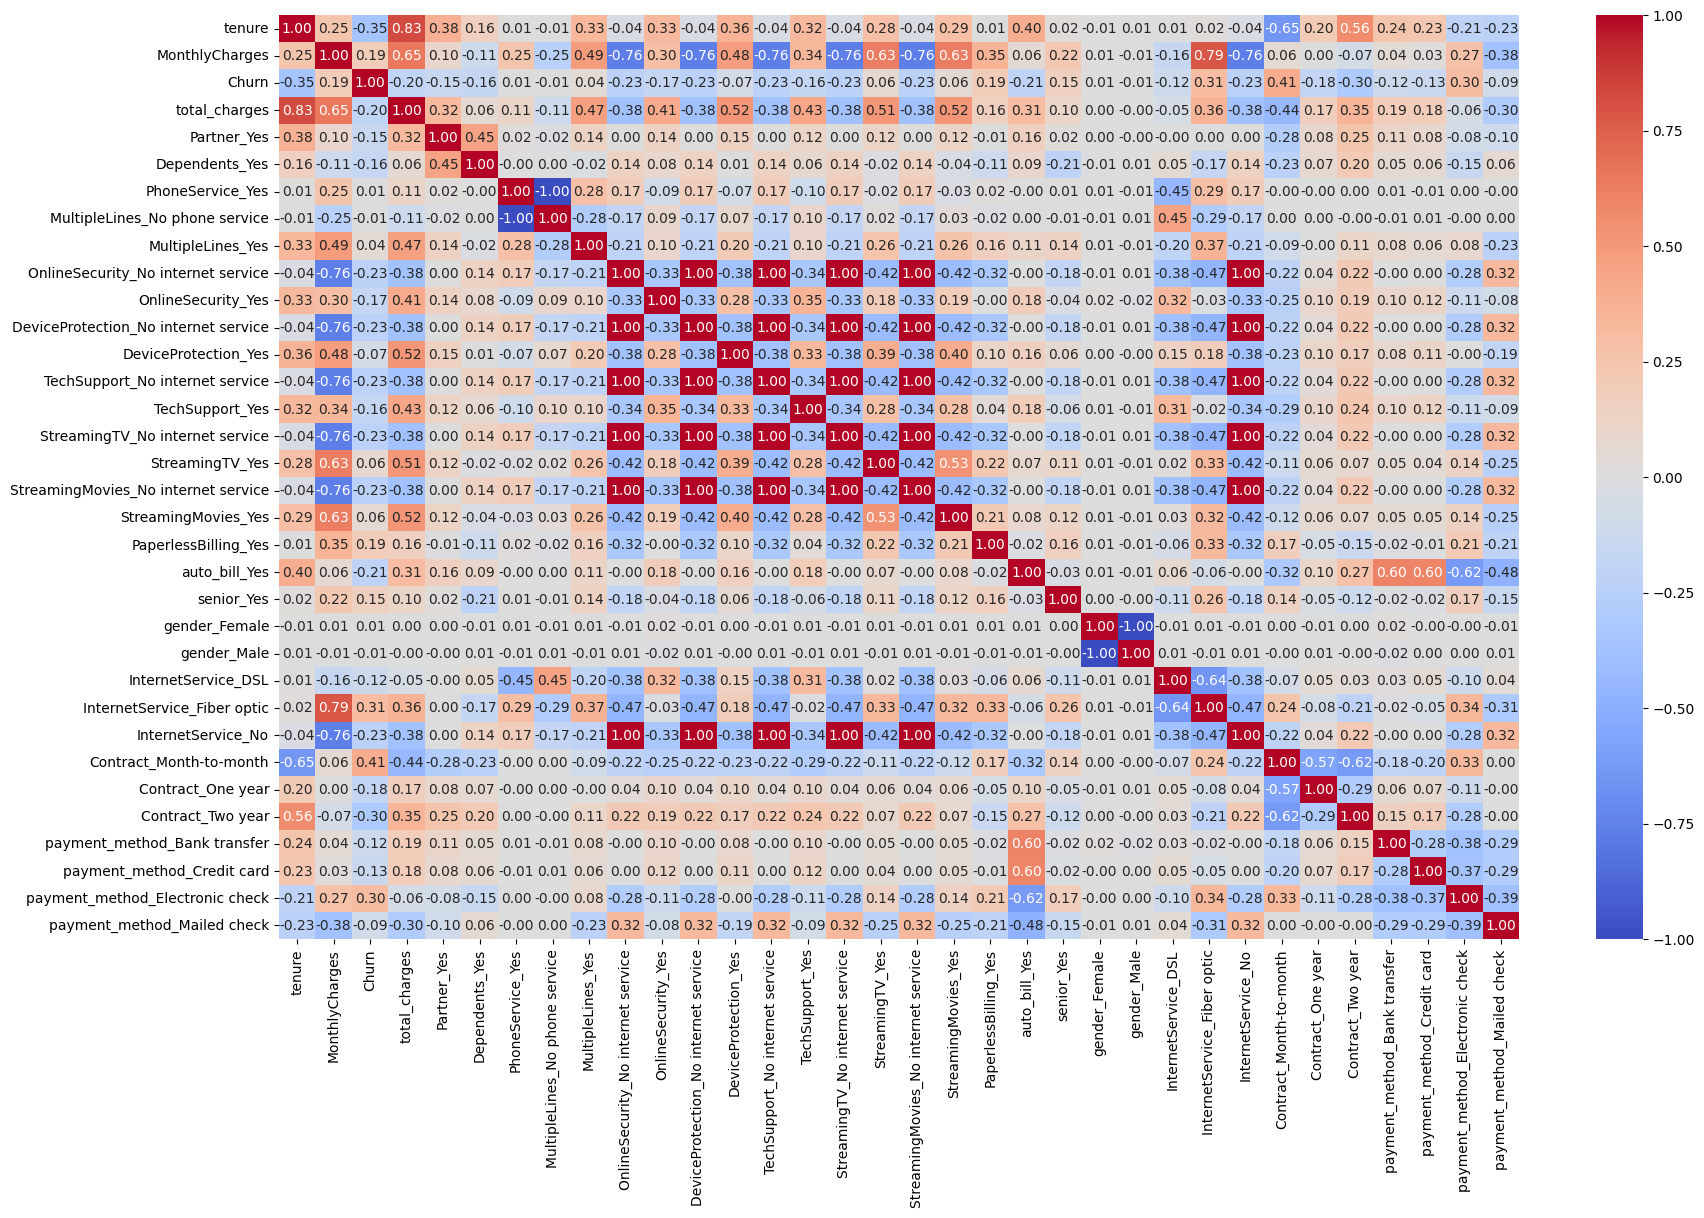

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Include the code from the previous cell to define df_encoded
df = pd.read_csv('../data/GROUP1_TELCO_CHURN_for_Correlation.csv')  # Now pd.read_csv will work correctly

corr_matrix = df.corr()

# Plot the correlation heatmap (optional)
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.show()

<ipython-input-15-15fb4b9b293b>:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('plasma', len(correlations))(np.linspace(0, 1, len(correlations)))


<Axes: >

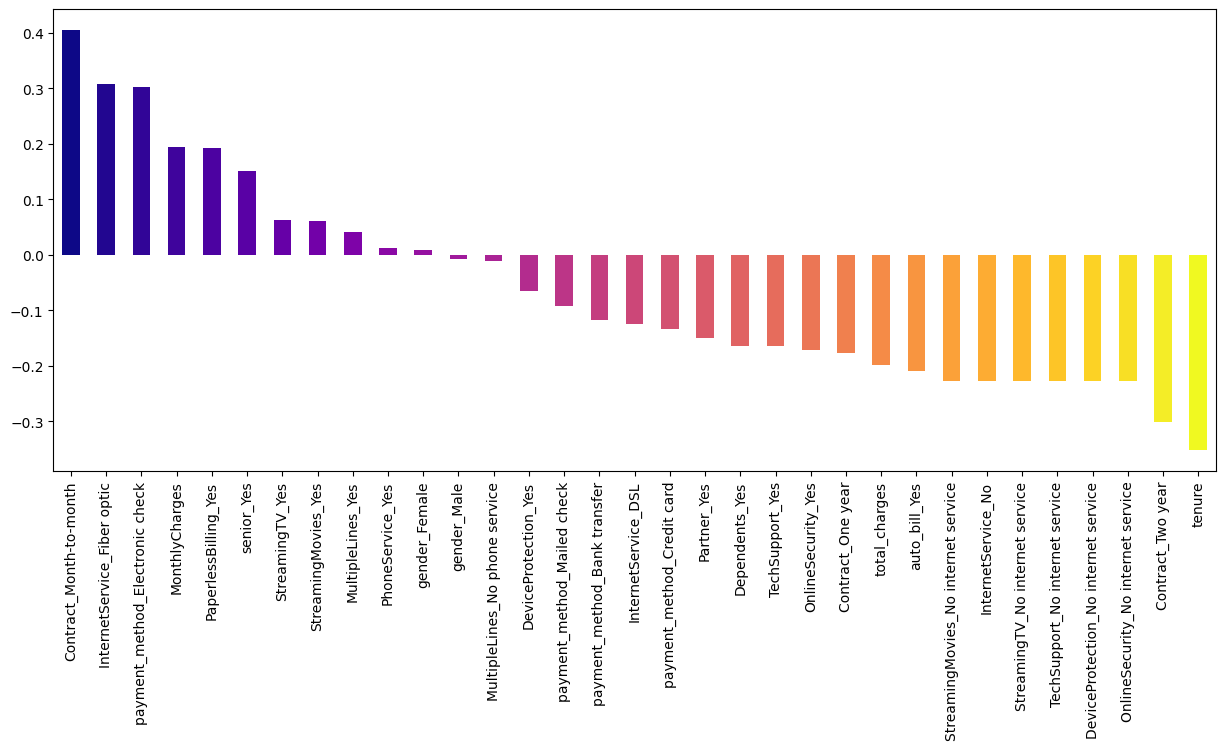

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Correct the file path to include the '../data/' directory
df = pd.read_csv('../data/GROUP1_TELCO_CHURN_for_Correlation.csv')
correlations = df.corr()['Churn'].drop('Churn')
colors = plt.cm.get_cmap('plasma', len(correlations))(np.linspace(0, 1, len(correlations)))
plt.figure(figsize=(15,6))
correlations.sort_values(ascending=False).plot(kind='bar', color=colors)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Correct the file path to include the '../data/' directory
df = pd.read_csv('../data/GROUP1_TELCO_CHURN_for_Correlation.csv')
correlations = df.corr()['Churn'].drop('Churn')

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Display the correlation matrix
print(correlation_matrix)

                                        tenure  MonthlyCharges     Churn  \
tenure                                1.000000        0.247900 -0.352229   
MonthlyCharges                        0.247900        1.000000  0.193356   
Churn                                -0.352229        0.193356  1.000000   
total_charges                         0.826178        0.651174 -0.198324   
Partner_Yes                           0.379697        0.096848 -0.150448   
Dependents_Yes                        0.159712       -0.113890 -0.164221   
PhoneService_Yes                      0.008448        0.247398  0.011942   
MultipleLines_No phone service       -0.008448       -0.247398 -0.011942   
MultipleLines_Yes                     0.331941        0.490434  0.040102   
OnlineSecurity_No internet service   -0.039062       -0.763557 -0.227890   
OnlineSecurity_Yes                    0.327203        0.296594 -0.171226   
DeviceProtection_No internet service -0.039062       -0.763557 -0.227890   
DeviceProtec

<ipython-input-46-17bf6ff79d27>:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-46-17bf6ff79d27>:26: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




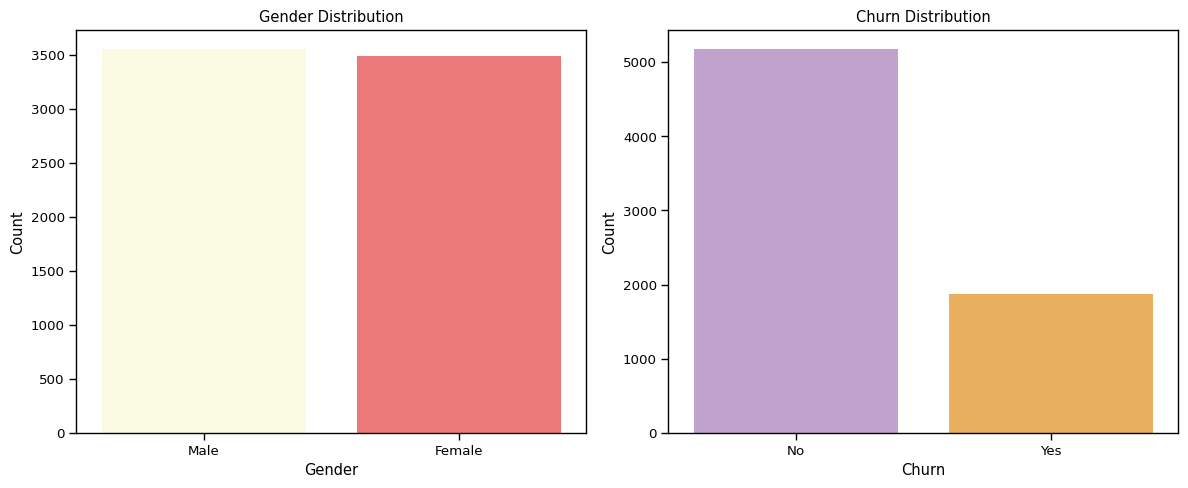

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
df = pd.read_csv('../data/GROUP1_TELCO_CHURN_For_DV.csv')

gender_counts = df['gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']

churn_counts = df['Churn'].value_counts().reset_index()
churn_counts.columns = ['Churn', 'Count']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Custom colors for each plot
gender_colors = ['#FFFFE0', '#FF6666']  # Yellow for one gender, Red for the other
churn_colors = ['#C39BD3', '#FFB347']   # Yellow for no churn, Red for churn

# Create bar plot for Gender
sns.barplot(x='Gender', y='Count', data=gender_counts, ax=axes[0], palette=gender_colors)
axes[0].set_title('Gender Distribution')
axes[0].set_ylabel('Count')

# Create bar plot for Churn
sns.barplot(x='Churn', y='Count', data=churn_counts, ax=axes[1], palette=churn_colors)
axes[1].set_title('Churn Distribution')
axes[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()


In [ ]:
Partner_counts = df['Partner'].value_counts().reset_index()
partner_counts.columns = ['Partner', 'Count']

churn_counts = df['Churn'].value_counts().reset_index()
churn_counts.columns = ['Churn', 'Count']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Custom colors for each plot
Partner_colors = ['#FFFFE0', '#FF6666']  # Yellow for one gender, Red for the other
churn_colors = ['#C39BD3', '#FFB347']   # Yellow for no churn, Red for churn

# Create bar plot for Gender
sns.barplot(x='Partner', y='Count', data=Partner_counts, ax=axes[0], palette=Partner_colors)
axes[0].set_title('Partner Distribution')
axes[0].set_ylabel('Count')

# Create bar plot for Churn
sns.barplot(x='Churn', y='Count', data=churn_counts, ax=axes[1], palette=churn_colors)
axes[1].set_title('Churn Distribution')
axes[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

NameError: name 'partner_counts' is not defined

<ipython-input-65-3bbc78da0cc5>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-65-3bbc78da0cc5>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




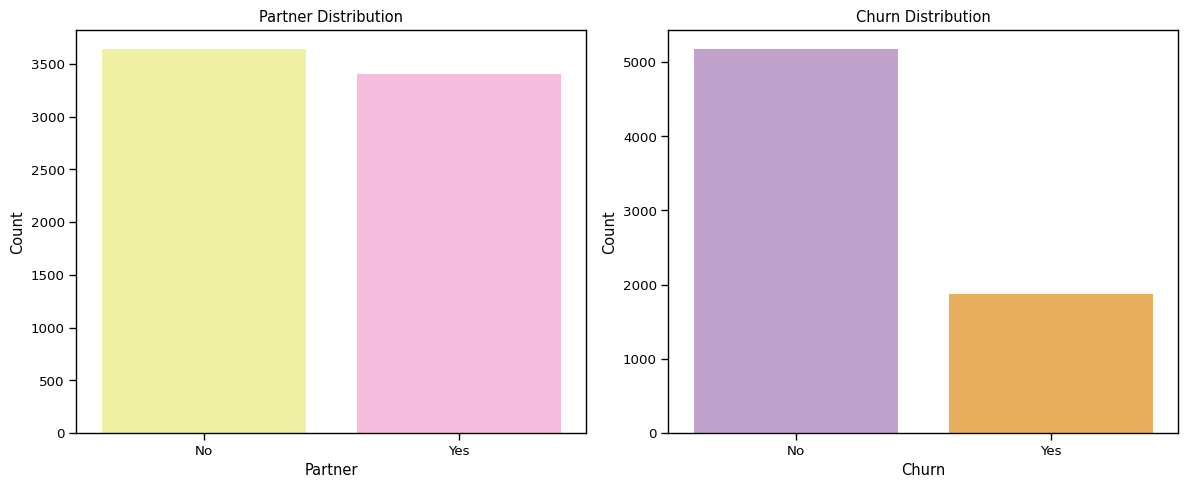

In [ ]:
Partner_counts = df['Partner'].value_counts().reset_index()
Partner_counts.columns = ['Partner', 'Count'] # Changed partner_counts to Partner_counts

churn_counts = df['Churn'].value_counts().reset_index()
churn_counts.columns = ['Churn', 'Count']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Custom colors for each plot
Partner_colors = ['#FDFD96', '#FFB3DE']  # Yellow for one gender, Red for the other
churn_colors = ['#C39BD3', '#FFB347']   # Yellow for no churn, Red for churn

# Create bar plot for Gender
sns.barplot(x='Partner', y='Count', data=Partner_counts, ax=axes[0], palette=Partner_colors) # Changed partner_counts to Partner_counts
axes[0].set_title('Partner Distribution')
axes[0].set_ylabel('Count')

# Create bar plot for Churn
sns.barplot(x='Churn', y='Count', data=churn_counts, ax=axes[1], palette=churn_colors)
axes[1].set_title('Churn Distribution')
axes[1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.show()

<ipython-input-57-2a047f068f74>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-57-2a047f068f74>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




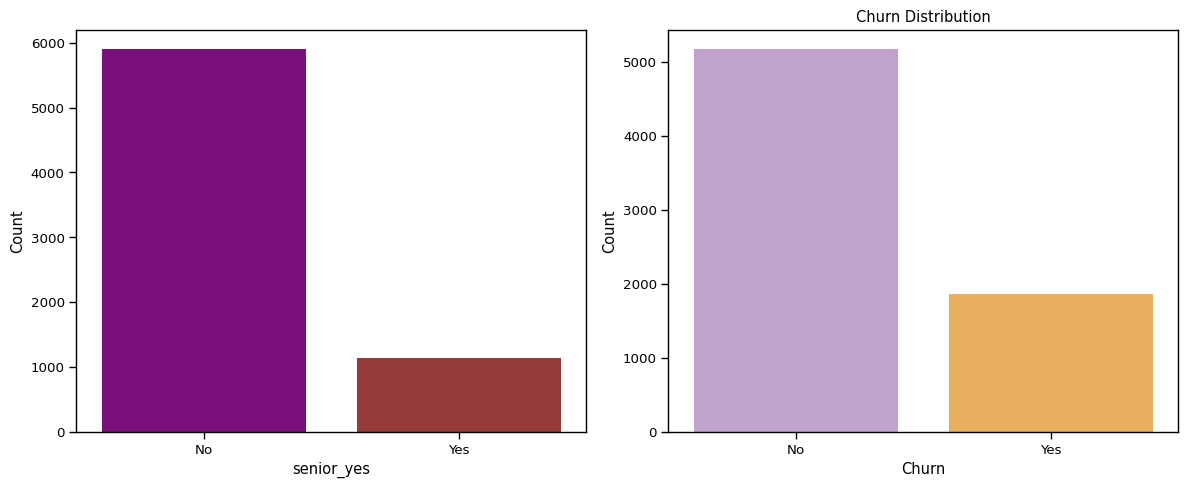

In [ ]:
seniorcitizen_counts = df['senior_yes'].value_counts().reset_index()
seniorcitizen_counts.columns = ['senior_yes', 'Count']

churn_counts = df['Churn'].value_counts().reset_index()
churn_counts.columns = ['Churn', 'Count']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

seniorcitizen_colors = ['#8B008B', '#A52A2A']  # Yellow for one gender, Red for the other
churn_colors = ['#C39BD3', '#FFB347']   # Yellow for no churn, Red for churn

sns.barplot(x='senior_yes', y='Count', data=senior_yes_counts, ax=axes[0], palette=senior_yes_colors)
axes[1].set_title('SeniorCitizen Distribution')
axes[1].set_ylabel('Count')


sns.barplot(x='Churn', y='Count', data=churn_counts, ax=axes[1], palette=churn_colors)
axes[1].set_title('Churn Distribution')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

<ipython-input-58-6317f0a2b0c8>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-58-6317f0a2b0c8>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




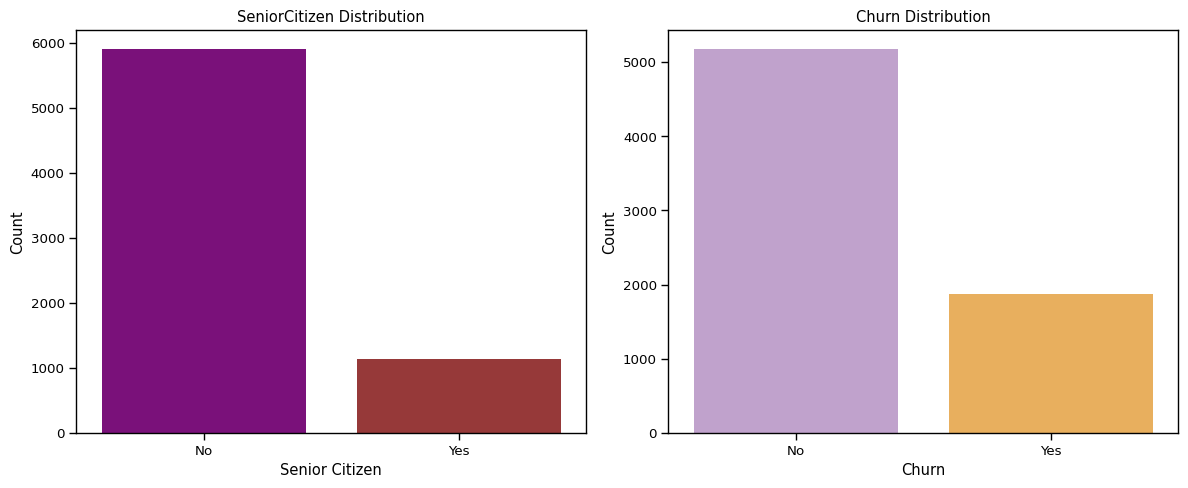

In [ ]:
seniorcitizen_counts = df['senior_yes'].value_counts().reset_index()
seniorcitizen_counts.columns = ['senior_yes', 'Count']

churn_counts = df['Churn'].value_counts().reset_index()
churn_counts.columns = ['Churn', 'Count']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

seniorcitizen_colors = ['#8B008B', '#A52A2A']  # Yellow for one gender, Red for the other
churn_colors = ['#C39BD3', '#FFB347']   # Yellow for no churn, Red for churn

sns.barplot(x='senior_yes', y='Count', data=seniorcitizen_counts, ax=axes[0], palette=seniorcitizen_colors)
axes[0].set_title('SeniorCitizen Distribution')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Senior Citizen')  # Change xlabel for SeniorCitizen

sns.barplot(x='Churn', y='Count', data=churn_counts, ax=axes[1], palette=churn_colors)
axes[1].set_title('Churn Distribution')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

<ipython-input-59-ef2a1943bdb1>:21: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-59-ef2a1943bdb1>:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




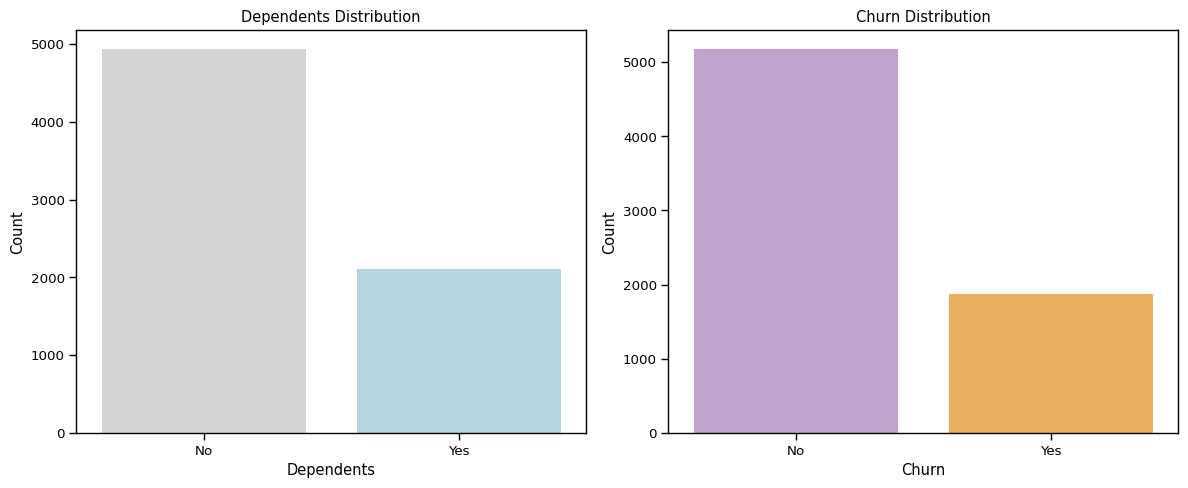

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
df = pd.read_csv('../data/GROUP1_TELCO_CHURN_For_DV.csv')

dependents_counts = df['Dependents'].value_counts().reset_index()
dependents_counts.columns = ['Dependents', 'Count']

churn_counts = df['Churn'].value_counts().reset_index()
churn_counts.columns = ['Churn', 'Count']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Custom colors for each plot
dependents_colors = ['#D3D3D3', '#ADD8E6']  # Yellow for one gender, Red for the other
churn_colors = ['#C39BD3', '#FFB347']   # Yellow for no churn, Red for churn

# Create bar plot for Gender
sns.barplot(x='Dependents', y='Count', data=dependents_counts, ax=axes[0], palette=dependents_colors)
axes[0].set_title('Dependents Distribution')
axes[0].set_ylabel('Count')

sns.barplot(x='Churn', y='Count', data=churn_counts, ax=axes[1], palette=churn_colors)
axes[1].set_title('Churn Distribution')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (previous code to create gender_counts, churn_counts, etc.)
gender_counts = df['gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']

# Create variables for Dependents, SeniorCitizen, and Partner
dependents_counts = df['Dependents'].value_counts().reset_index()
dependents_counts.columns = ['Dependents', 'Count']

senior_citizen_counts = df['SeniorCitizen'].value_counts().reset_index()
senior_citizen_counts.columns = ['SeniorCitizen', 'Count']

partner_counts = df['Partner'].value_counts().reset_index()
partner_counts.columns = ['Partner', 'Count']

# Create a figure and axes for the subplots (adjust grid as needed)
fig, axes = plt.subplots(3, 2, figsize=(12, 12))  # 3 rows, 2 columns

# ... (previous code to plot Gender, Churn, Contract, Payment Method)
sns.barplot(x='Gender', y='Count', data=gender_counts, ax=axes[0], palette=gender_colors)
axes[0].set_title('Gender Distribution')
axes[0].set_ylabel('Count')

sns.barplot(x='Churn', y='Count', data=churn_counts, ax=axes[1], palette=churn_colors)
axes[1].set_title('Churn Distribution')
axes[1].set_ylabel('Count')

# Plot Dependents distribution
sns.barplot(x='Dependents', y='Count', data=dependents_counts, ax=axes[2, 0])
axes[2, 0].set_title('Dependents Distribution')

# Plot SeniorCitizen distribution
sns.barplot(x='SeniorCitizen', y='Count', data=senior_citizen_counts, ax=axes[2, 1])
axes[2, 1].set_title('Senior Citizen Distribution')

# Plot Partner distribution
# ... (You might need to adjust the grid or add another subplot for Partner)

# Adjust layout
plt.tight_layout()
plt.show()

KeyError: 'SeniorCitizen'

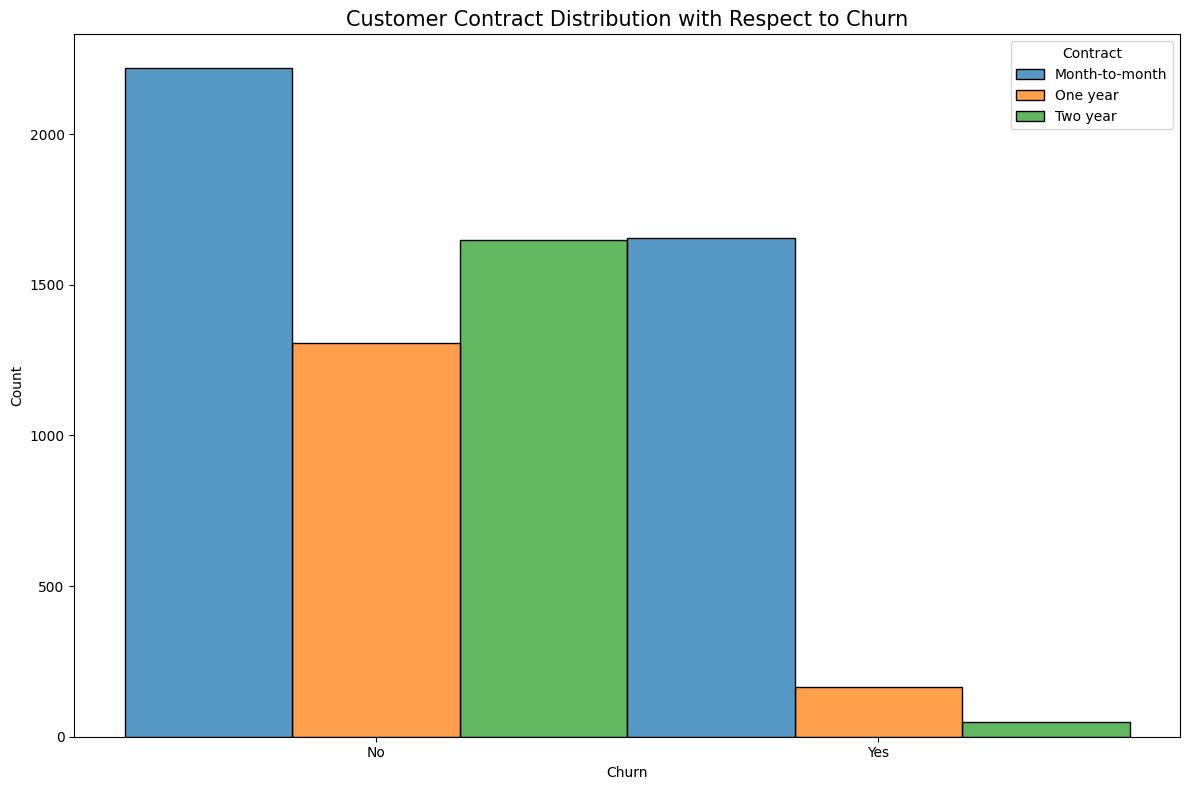

In [ ]:
plt.figure(figsize=(12, 8))

# Create a grouped histogram
sns.histplot(data=df, x="Churn", hue="Contract", multiple="dodge", stat="count", bins=2)

# Set title and labels
plt.title("Customer Contract Distribution with Respect to Churn", fontsize=15)
plt.xlabel("Churn", fontsize=10)
plt.ylabel("Count", fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px

# Define custom colors for each contract type
custom_colors = {
    'Month-to-month': 'lightpink',
    'One year': 'lightblue',
    'Two year': 'mediumpurple'
}

# Create the histogram and apply the custom color mapping
fig = px.histogram(
    df,
    x="Churn",
    color="Contract",
    barmode="group",
    title="<b>Customer contract distribution<b>",
    color_discrete_map=custom_colors  # Add custom color mapping
)

# Update layout
fig.update_layout(width=700, height=500, bargap=0.1)

# Show plot
fig.show()

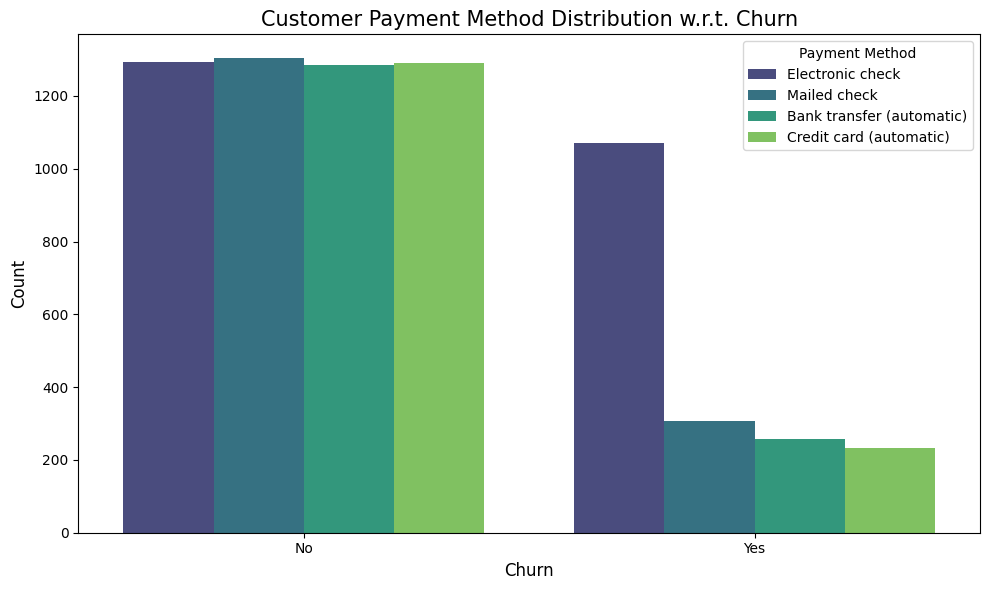

In [ ]:
plt.figure(figsize=(10, 6))

# Create a count plot for Churn by Payment Method
sns.countplot(data=df, x='Churn', hue='PaymentMethod', palette='viridis')

# Set title and labels
plt.title("Customer Payment Method Distribution w.r.t. Churn", fontsize=15)
plt.xlabel("Churn", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Show the plot
plt.legend(title='Payment Method')
plt.tight_layout()
plt.show()

<ipython-input-21-c1e8d1752585>:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-21-c1e8d1752585>:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




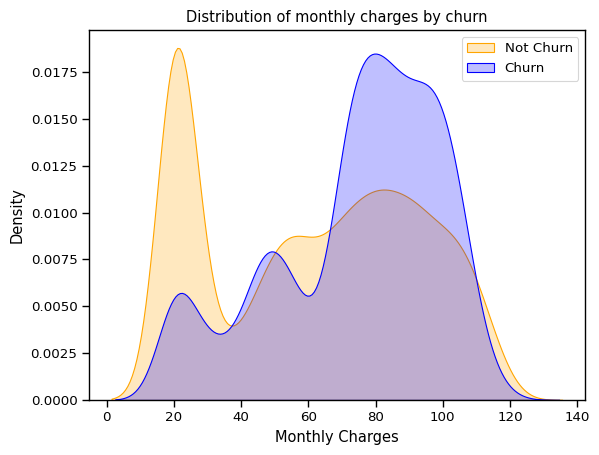

In [ ]:
sns.set_context("paper",font_scale=1.1)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Orange", shade = True); # Changed color to 'Orange'
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True);
ax.legend(["Not Churn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('Monthly Charges');
ax.set_title('Distribution of monthly charges by churn');

<ipython-input-26-f479ba3c32fc>:1: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-26-f479ba3c32fc>:3: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




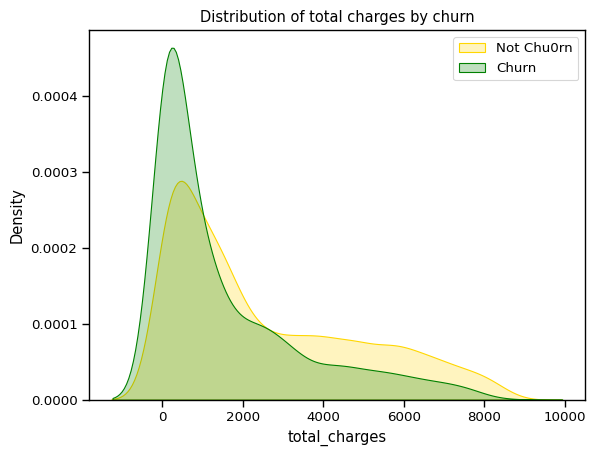

In [ ]:
ax = sns.kdeplot(df.total_charges[(df["Churn"] == 'No') ],
                color="Gold", shade = True);
ax = sns.kdeplot(df.total_charges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Green", shade= True);
ax.legend(["Not Chu0rn","Churn"],loc='upper right');
ax.set_ylabel('Density');
ax.set_xlabel('total_charges');
ax.set_title('Distribution of total charges by churn');

<ipython-input-28-825fe7f87131>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




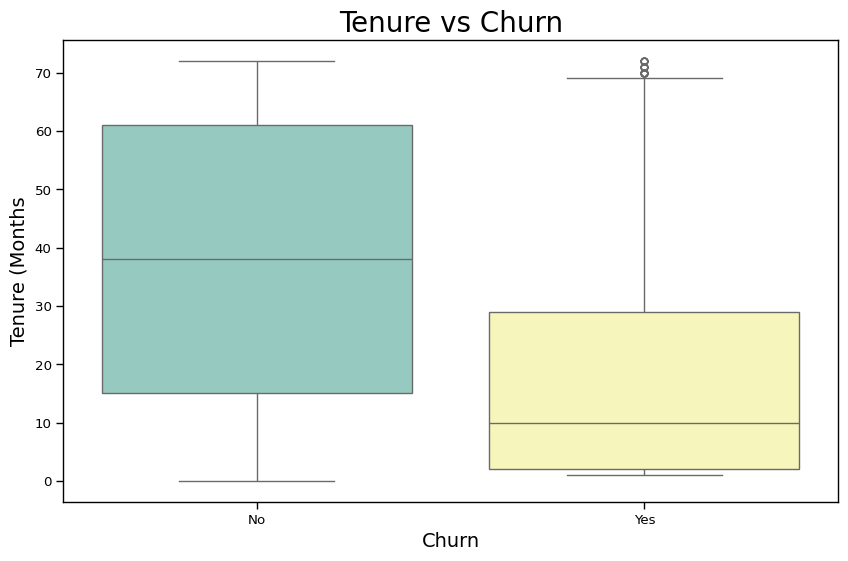

In [ ]:
# Create the box plot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=df, palette="Set3")  # Add palette="Set3"

# Update axis titles
plt.xlabel('Churn', fontsize=14)
plt.ylabel('Tenure (Months', fontsize=14)

# Update the title
plt.title('Tenure vs Churn', fontsize=20)

# Show the plot
plt.show()

In [ ]:
color_map = {"Yes": '#00008B', "No": '#FFFF00'}
fig = px.histogram(df, x="Churn", color="Partner", barmode="group", title="<b>Chrun distribution about Partners</b>", color_discrete_map=color_map)
fig.update_layout(width=700, height=500, bargap=0.1, title_x=0.5)
fig.show()

In [ ]:
fig = px.pie(data, title="Contract Distribution",names="Contract", color_discrete_sequence=px.colors.sequential.thermal)
fig.update_traces(hole=.5, hoverinfo="label+percent+name",textinfo='percent+label', textfont_size=16)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='skyblue'),
    template="plotly_white",
    width=500,
    height=500
)
fig.add_annotation(
    text="Contract",
    showarrow=False,
    font=dict(size=20, color="skyblue"),
    xref="paper", yref="paper",
    x=0.5, y=0.5
)
fig.show()

NameError: name 'data' is not defined

In [ ]:
import plotly.express as px

# Assuming 'df' is your DataFrame containing the data
fig = px.pie(df, title="Contract Distribution", names="Contract", color_discrete_sequence=px.colors.sequential.thermal)  # Changed 'data' to 'df'
fig.update_traces(hole=.5, hoverinfo="label+percent+name", textinfo='percent+label', textfont_size=16)
fig.update_layout(
    title_x=0.5,
    title_font=dict(size=20, color='black'),
    template="plotly_white",
    width=500,
    height=500
)
fig.add_annotation(
    text="Contract",
    showarrow=False,
    font=dict(size=20, color="skyblue"),
    xref="paper", yref="paper",
    x=0.5, y=0.5
)
fig.show()

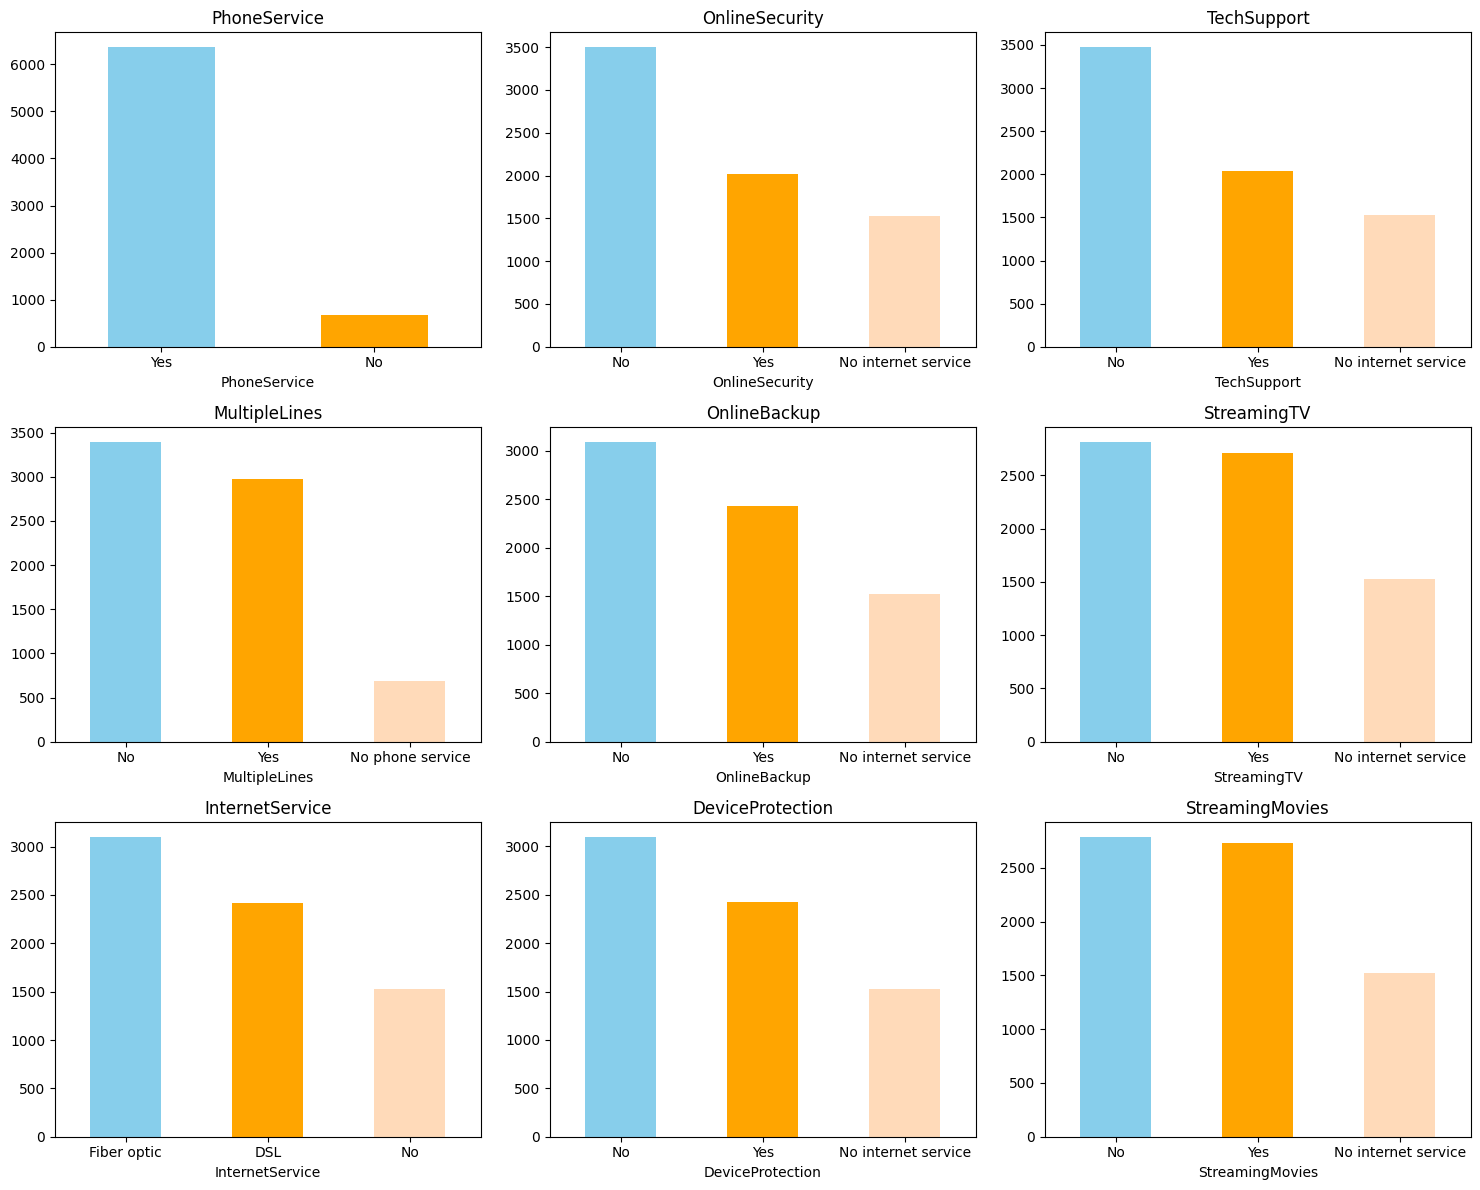

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Define a list of colors for the bars
bar_colors = ['skyblue', 'orange', 'peachpuff', 'red', 'purple']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
for i, item in enumerate(services):
    if i < 3:
        ax = df[item].value_counts().plot(kind='bar', ax=axes[i, 0], rot=0, color=bar_colors)
    elif i >= 3 and i < 6:
        ax = df[item].value_counts().plot(kind='bar', ax=axes[i - 3, 1], rot=0, color=bar_colors)
    elif i < 9:
        ax = df[item].value_counts().plot(kind='bar', ax=axes[i - 6, 2], rot=0, color=bar_colors)

    ax.set_title(item)

plt.tight_layout()
plt.show()